In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Table 1 from Costello et al. (2018)
d = {
    'n': [1, 2, 3, 4, 6, 8, 10, 20, 30, 40, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6],
    'L10': [0.105, 0.530, 1.102, 1.742, 3.150, 4.655, 6.221, 14.53, 23.33, 32.11, 87.42, 2.78e2, 9.596e2, 2.93e3, 9.872e3, 2.978e4, 9.959e4, 2.993e5, 9.9687e5],
    'L50': [0.693, 1.678, 2.674, 3.672, 5.67, 7.67, 9.67, 19.67, 29.67, 39.67, 99.67, 2.997e2, 9.997e2, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6],
    'L99': [4.605, 6.638, 8.406, 10.05, 13.11, 16, 18.87, 31.85, 44.19, 56.16, 1.247e2, 3.418e2, 1.075e3, 3.129e3, 1.023e4, 3.041e4, 1.007e5, 3.013e5, 1.002e6]
}
df = pd.DataFrame(d)
df.head()

,n,L10,L50,L99
0,1.0,0.105,0.693,4.605
1,2.0,0.530,1.678,6.638
2,3.0,1.102,2.674,8.406
3,4.0,1.742,3.672,10.050
4,6.0,3.150,5.670,13.110


In [73]:
# constants
c = 0.41
d = 1/3
g = 1.61e15

# primaries
a = 6.3e-11
b = -2.7
vf = 5.7e11
rhom = 2500
K1 = 0.132
K2 = 0.26
Kr = 1.1
Kd = 0.6
mu = 0.41
Y = 0.01
rhot = 1500
alpha = K2 * (( (Y/rhot)*vf**2 )**(0.5*(2+mu)))
beta = (-3*mu)/(2+mu)
gamma = (K1*np.pi*rhom)/(6*rhot)
di = 2 * Kr
eps = (g/(2*vf**2))*(rhom/rhot)**(1/3)

def overturn_grav(lam, t):
    t1 = d * Kd/(2*Kr)
    t2_num = 4 * lam * (di*(gamma*eps**beta)**(1/3))**((3*b)/(3+beta))
    t2_den = a * (c**2) * np.pi * t
    exp = (3 + beta) / (3 * b + 3 + beta)
    return t1 * (t2_num/t2_den)**exp

times = (1e2, 1e6, 1e9)
for t, og in enumerate(('og100', 'og1M', 'og1G')):
    for lam in ('L10', 'L50', 'L99'):
        df[og+lam] = 10*overturn_grav(df[lam], times[t])

def overturn_str(lam, t):
    t1 = d * Kd/(2*Kr)
    t2_num = 4 * lam * (di*(gamma*alpha**beta)**(1/3))**b
    t2_den = a * (c**2) * np.pi * t
    exp = 1 / (b + 1)
    return t1 * (t2_num/t2_den)**exp

times = (1e2, 1e6, 1e9)
for t, og in enumerate(('os100', 'os1M', 'os1G')):
    for lam in ('L10', 'L50', 'L99'):
        df[og+lam] = 10*overturn_str(df[lam], times[t])

def cum_turns(lam, Dc=1, t=1, c=1):
    return (4*lam)/(np.pi*(c**2)*Dc*t)

df['RD10'] = cum_turns(df['L10'], 1, 100, c=0.41)
df['RD50'] = cum_turns(df['L50'], 1, 100, c=0.41)
df['RD99'] = cum_turns(df['L99'], 1, 100, c=0.41)

def overturn(t, lam, dH, c=0.41, u=1, v=1):
    num = 4 * lam
    den = u*np.pi*(c**2)*t
    exp = 1/(v+1)
    return dH * (num/den)**exp


def ot50(t):
    d = 7.07e-7 * t**0.59
    large = d>0.6
    d[large] = 1.58e-5 * t[large]**0.44
    return d

df.head()

,n,L10,L50,L99,Nq10,Nq50,Nq99,RD10,RD50,RD99,...,og1GL99,os100L10,os100L50,os100L99,os1ML10,os1ML50,os1ML99,os1GL10,os1GL50,os1GL99
0,1.0,0.105,0.693,4.605,0.133690,0.882355,5.863268,0.007953,0.052490,0.348796,...,7.578478,2.681341e-11,8.836239e-12,2.900321e-12,6.043566e-09,1.991630e-09,6.537131e-10,3.515598e-07,1.158549e-07,3.802709e-08
1,2.0,0.530,1.678,6.638,0.674817,2.136496,8.451764,0.040144,0.127097,0.502782,...,6.443331,1.034598e-11,5.252312e-12,2.338998e-12,2.331916e-09,1.183837e-09,5.271946e-10,1.356497e-07,6.886485e-08,3.066739e-08
2,3.0,1.102,2.674,8.406,1.403110,3.404643,10.702852,0.083469,0.202537,0.636696,...,5.802331,6.726179e-12,3.993096e-12,2.035659e-12,1.516036e-09,9.000173e-10,4.588241e-10,8.818921e-08,5.235483e-08,2.669021e-08
3,4.0,1.742,3.672,10.050,2.217983,4.675336,12.796057,0.131944,0.278128,0.761217,...,5.360158,5.137929e-12,3.313488e-12,1.832617e-12,1.158055e-09,7.468383e-10,4.130597e-10,6.736513e-08,4.344427e-08,2.402806e-08
4,6.0,3.150,5.670,13.110,4.010705,7.219268,16.692170,0.238590,0.429463,0.992991,...,4.763784,3.626246e-12,2.566238e-12,1.567356e-12,8.173319e-10,5.784131e-10,3.532718e-10,4.754494e-08,3.364682e-08,2.055014e-08


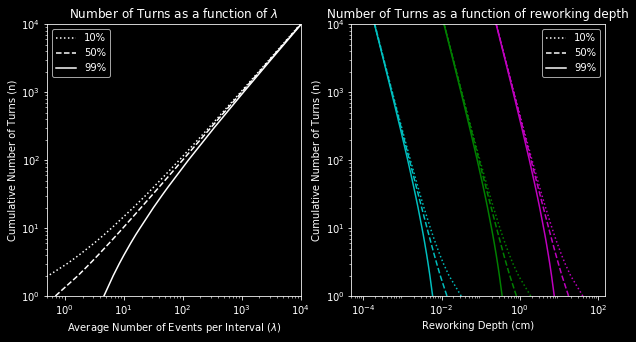

In [82]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))

# Figure 5 a) from Costello (2018)
axs[0].set_title('Number of Turns as a function of $\lambda$')
axs[0].set_ylabel('Cumulative Number of Turns (n)')
axs[0].set_xlabel('Average Number of Events per Interval ($\lambda$)')
axs[0].loglog(df['L10'], df['n'], 'w:', label='10%')
axs[0].loglog(df['L50'], df['n'], 'w--', label='50%')
axs[0].loglog(df['L99'], df['n'], 'w-', label='99%')
axs[0].set_ylim(1e0, 1e4)
axs[0].set_xlim(0.5, 1e4)
axs[0].legend()


# Figure 5 b) from Costello (2018)
axs[1].set_title('Number of Turns as a function of reworking depth')
axs[1].set_ylabel('Cumulative Number of Turns (n)')
axs[1].set_xlabel('Reworking Depth (cm)')
axs[1].loglog(df['og100L10'], df['n'], 'c:', label='10%')
axs[1].loglog(df['og1ML10'], df['n'], 'g:', label='_nolegend_')
axs[1].loglog(df['og1GL10'], df['n'], 'm:', label='_nolegend_')
axs[1].loglog(df['og100L50'], df['n'], 'c--', label='50%')
axs[1].loglog(df['og1ML50'], df['n'], 'g--', label='_nolegend_')
axs[1].loglog(df['og1GL50'], df['n'], 'm--', label='_nolegend_')
axs[1].loglog(df['og100L99'], df['n'], 'c-', label='99%')
axs[1].loglog(df['og1ML99'], df['n'], 'g-', label='_nolegend_')
axs[1].loglog(df['og1GL99'], df['n'], 'm-', label='_nolegend_')
axs[1].set_ylim(1e0, 1e4)
axs[1].set_xlim(0.5e-4, 1.5e2)
axs[1].xaxis.set_ticks([1e-4, 1e-2, 1e0, 1e2])
l = axs[1].legend()
l.legendHandles[0].set_color('w')
l.legendHandles[1].set_color('w')
l.legendHandles[2].set_color('w')

plt.savefig('overturn.png', dpi=600)